<h3 align=center>
Synthesis
</h3>

### General

1. Synthesis examples
1. Locality issues
1. Pitch adjustment
 - LPC
 - PSOLA

### Synthesis

Here are all the `import` statements we'll need for this notebook:

In [2]:
import matplotlib.pyplot as plt
from IPython.display import Audio
import pylab
from scipy.io import wavfile
import speechtech as sp
import scipy.signal as ss
import numpy as np

It's the same wave.

### Concatenative synthesis

The identification of sounds depends on neighboring sounds:

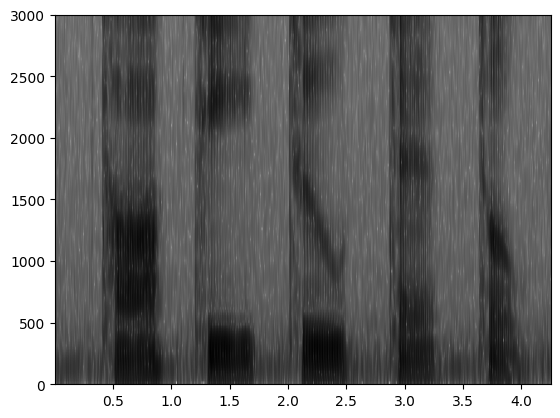

In [3]:
fs,w = wavfile.read('tV.wav')

#make the spectrogram
pylab.specgram(
    w,
    Fs=fs,
    NFFT=int(fs*.01),
    cmap='Greys',
    sides='default',
    pad_to=2048
)
#only display up to 8000hz
pylab.axis(ymax=3000)
pylab.show()

Audio(w,rate=fs)

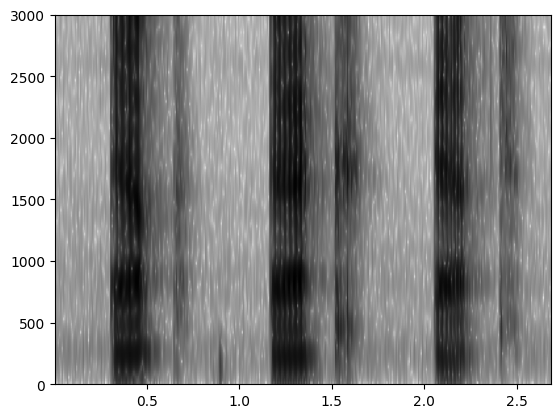

In [4]:
fs,w = wavfile.read('aeC.wav')

#make the spectrogram
pylab.specgram(
    w,
    Fs=fs,
    NFFT=int(fs*.01),
    cmap='Greys',
    sides='default',
    pad_to=2048
)
#only display up to 8000hz
pylab.axis(ymax=3000)
pylab.show()

Audio(w,rate=fs)

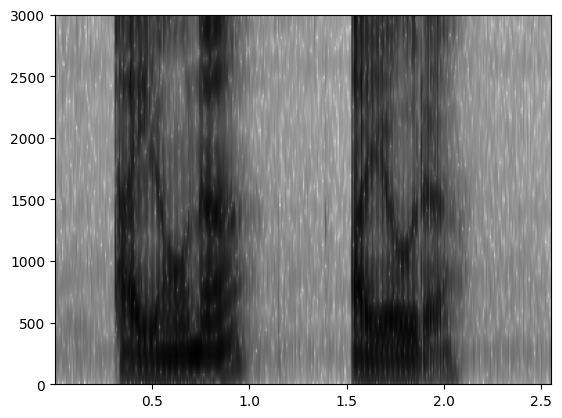

In [5]:
fs,w = wavfile.read('ioCa.wav')

#make the spectrogram
pylab.specgram(
    w,
    Fs=fs,
    NFFT=int(fs*.01),
    cmap='Greys',
    sides='default',
    pad_to=2048
)
#only display up to 8000hz
pylab.axis(ymax=3000)
pylab.show()

Audio(w,rate=fs)

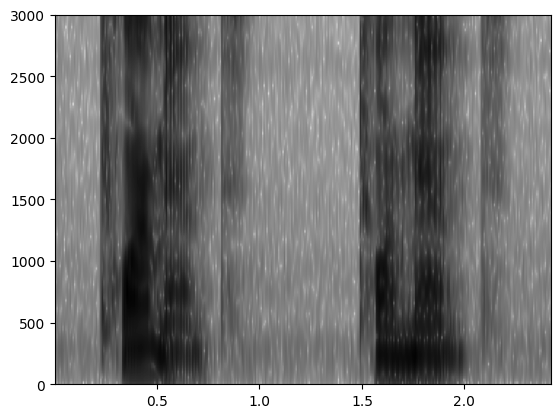

In [6]:
fs,w = wavfile.read('torment.wav')

#make the spectrogram
pylab.specgram(
    w,
    Fs=fs,
    NFFT=int(fs*.01),
    cmap='Greys',
    sides='default',
    pad_to=2048
)
#only display up to 8000hz
pylab.axis(ymax=3000)
pylab.show()

Audio(w,rate=fs)

### Pitch adjustment

A big issue for concatenative synthesis is adjusting the pitch of segments so they're all in sync.

We can use LPC for pitch adjustment, but we need a better model of a glottal pulse.

Một vấn đề lớn đối với tổng hợp nối tiếp là điều chỉnh cao độ của các đoạn để chúng đồng bộ.

Chúng ta có thể sử dụng LPC để điều chỉnh cao độ, nhưng chúng ta cần một mô hình xung thanh quản tốt hơn.

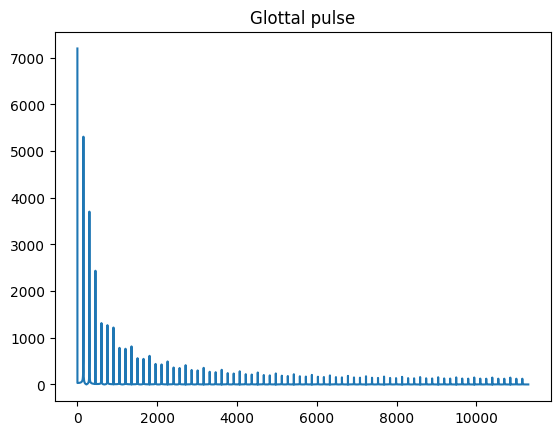

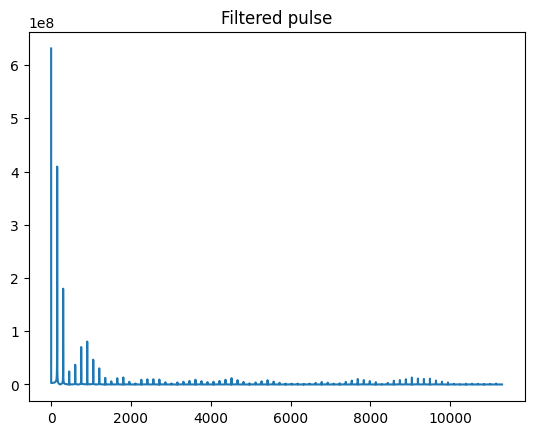

In [7]:
#load wave
fs,w = wavfile.read('mha.wav')
#do lpc
thelpc = sp.lpc(w,30)
#make glottal pulse
g = sp.glottal(150)
#filter
res = ss.lfilter(thelpc,.0001,g)

a,b = sp.spec(g,len(g))
plt.plot(b,a)
plt.title('Glottal pulse')
plt.show()

a,b = sp.spec(res,len(res))
plt.plot(b,a)
plt.title('Filtered pulse')
plt.show()

Audio(res,rate=len(res))

Here's another version where we start with the same kind of glottal pulse you used in the second assignment.

Đây là một phiên bản khác trong đó chúng ta bắt đầu với cùng loại xung thanh quản mà bạn đã sử dụng trong bài tập thứ hai.

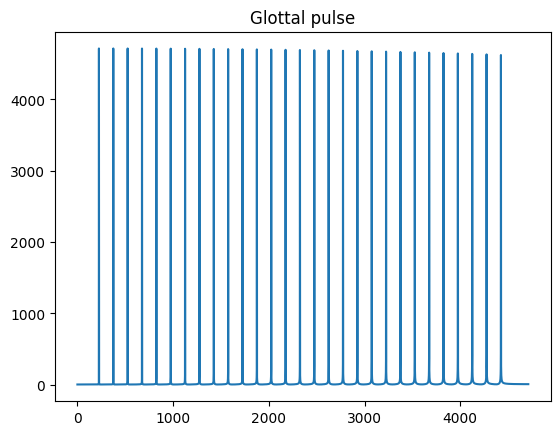

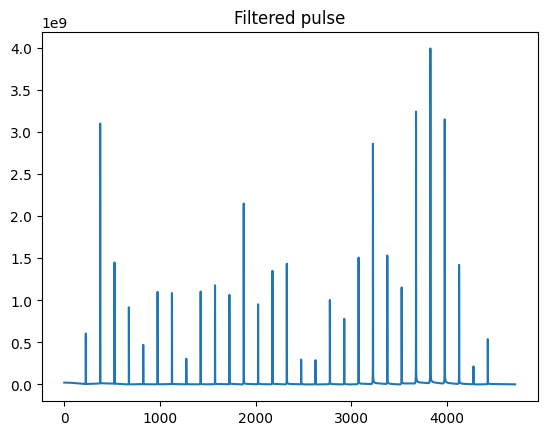

In [8]:
f0 = 150

f = f0
hs = []
while f <= 3000:
    h = np.sin(f/100*np.arange(0,f0*2*np.pi,.1))
    hs.append(h)
    f += 100
g = np.add.reduce(hs)

a,b = sp.spec(g,len(g))
plt.plot(b,a)
plt.title('Glottal pulse')
plt.show()

res = ss.lfilter(thelpc,.00001,g)

a,b = sp.spec(res,len(res))
plt.plot(b,a)
plt.title('Filtered pulse')
plt.show()

Audio(res,rate=len(res))

### PSOLA

Here's a demo of the technique in pictures. First, we load a wave and plot one cycle of it:

Dưới đây là bản demo kỹ thuật bằng hình ảnh. Đầu tiên, chúng ta tải một sóng và vẽ một chu kỳ của nó:

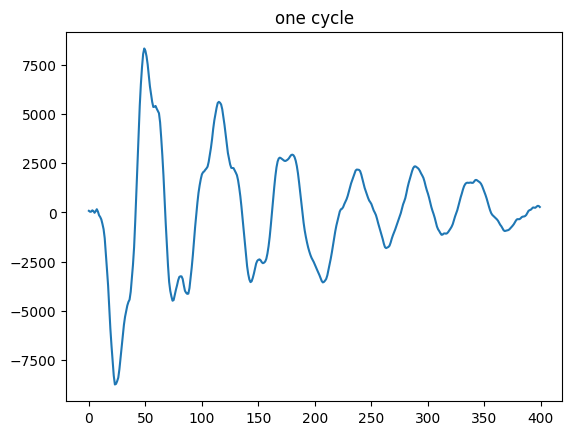

In [9]:
fs,w = wavfile.read('mha.wav')
#plot one cycle
plt.plot(w[1250:1650])
plt.title('one cycle')
plt.show()

Now we plot two cycles:

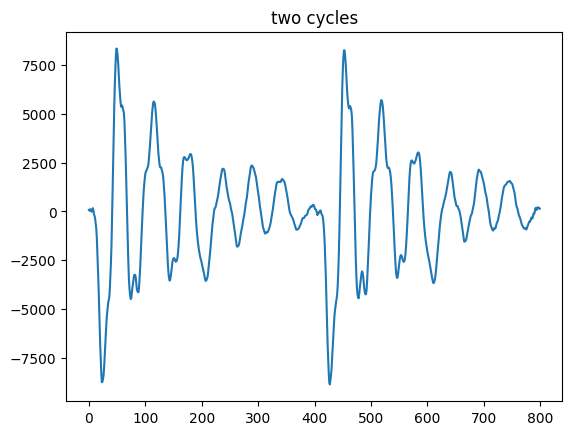

In [10]:
#plot two cycles
plt.plot(w[1250:2050])
plt.title('two cycles')
plt.show()

Next we highlight a cycle plus a half cycle on each side:

Tiếp theo chúng ta đánh dấu một chu kỳ cộng với một nửa chu kỳ ở mỗi bên:

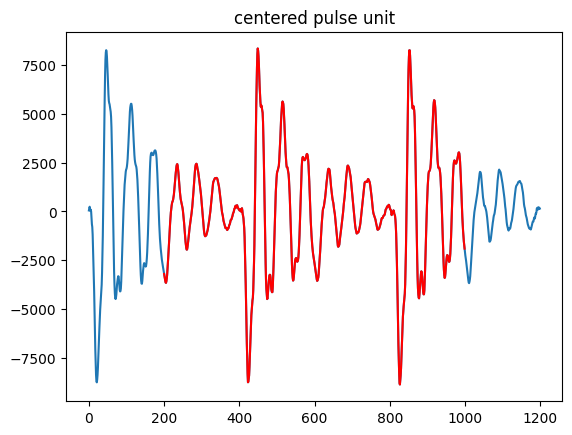

In [11]:
#plot highlighted cycle
plt.plot(range(1200),w[850:2050])
plt.plot(range(200,1000),w[1050:1850],'r')
plt.title('centered pulse unit')
plt.show()

We apply a "hanning window" to that sample and overlay it so we can see what that does:

Chúng ta áp dụng "cửa sổ Hanning" vào mẫu đó và phủ lên nó để chúng tôi có thể thấy tác dụng của nó:

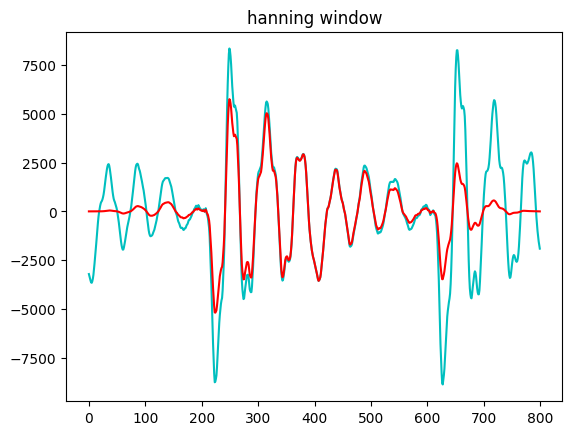

In [12]:
#plot hanning window
w1 = w[1050:1850]
h = np.hanning(len(w1))
plt.plot(w1,'c')
w1 = w1 * h
plt.plot(w1,'r')
plt.title('hanning window')
plt.show()

Now we take a bunch of those and concatenate them, overlaying the "halves":

Bây giờ chúng ta lấy một số phần đó và nối chúng lại, chồng lên "một nửa":

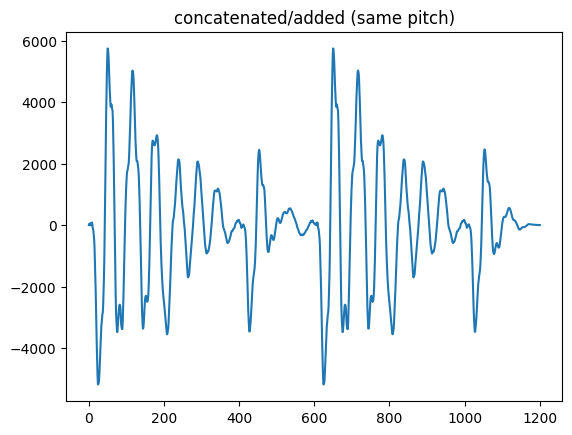

In [13]:
#concatenated/added hanning windows (same pitch)
w3 = np.zeros(1201)
w3[1:601] = w1[200:800]
w3[401:1201] = w3[401:1201] + w1
plt.plot(w3)
plt.title('concatenated/added (same pitch)')
plt.show()

Now we get a lower pitch by overlapping them *less*:

Bây giờ chúng ta có được cao độ thấp hơn bằng cách chồng chúng *ít hơn*:

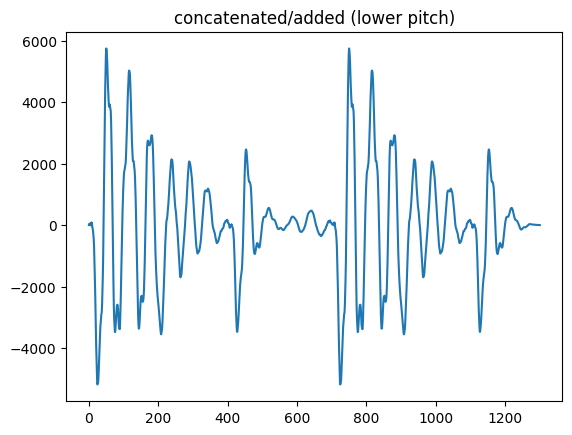

In [14]:
#concatenated/added hanning windows (lower pitch)
w3 = np.zeros(1301)
w3[1:601] = w1[200:800]
w3[501:1301] = w3[501:1301] + w1
plt.plot(w3)
plt.title('concatenated/added (lower pitch)')
plt.show()

Here's an actual audio example of PSOLA:

In [ ]:
w2 = sp.psolapitchdemo(w,fs,-.5)

Audio(w2,rate=fs)

### Variable unit selection

The best thing in concatenative synthesis is to not have to concatenate at all. In other words, if you want to have the computer produce *hat*, it'll sound better if you have that already recorded, rather than having to stitch together the diphones.

There's a math for this:

$$
d(\Theta,T) = \sum_{j=1}^N d_u(\theta_j,T) + \sum_{j=1}^{N-1} d_t(\theta_j,\theta_{j+1})
$$

We want to find the lowest cost:

$$
\hat{\Theta} = \mathrm{arg\ min}_{\Theta}\ d(\Theta,T)
$$